<a href="https://colab.research.google.com/github/sapna-90/Sentiment_Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
Train_data = pd.read_csv('/content/CP_train_data.csv')

In [3]:
Test_data = pd.read_csv('/content/CP_test_data.csv')

**Exploratory Data Analysis**

In [4]:
# Combine train and test datasets for unified processing

data = pd.concat([Train_data, Test_data], ignore_index=True)

In [5]:
print("\n--- Exploratory Data Analysis (EDA) ---\n")


--- Exploratory Data Analysis (EDA) ---



In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name of the product  5000 non-null   object
 1   Product Brand        5000 non-null   object
 2   categories           5000 non-null   object
 3   primaryCategories    5000 non-null   object
 4   reviews.date         5000 non-null   object
 5   reviews.text         5000 non-null   object
 6   reviews.title        4987 non-null   object
 7   sentiment            4000 non-null   object
dtypes: object(8)
memory usage: 312.6+ KB


In [7]:
data.head()

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [8]:
# Check for null values
print("Null values in the dataset:\n", data.isnull().sum())

Null values in the dataset:
 Name of the product       0
Product Brand             0
categories                0
primaryCategories         0
reviews.date              0
reviews.text              0
reviews.title            13
sentiment              1000
dtype: int64


In [9]:
# To remove the null values from the data

data.dropna(inplace=True)

In [10]:
# Check for null values
print("Null values in the dataset:\n", data.isnull().sum())

Null values in the dataset:
 Name of the product    0
Product Brand          0
categories             0
primaryCategories      0
reviews.date           0
reviews.text           0
reviews.title          0
sentiment              0
dtype: int64


<ipython-input-11-3c7c98c8aaf9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['sentiment'], palette='viridis')


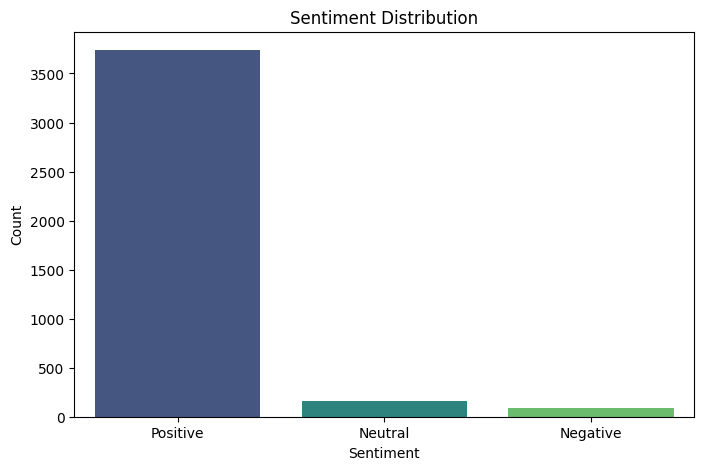

In [11]:
# Sentiment distribution analysis
plt.figure(figsize=(8, 5))
sns.countplot(x=data['sentiment'], palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

The sentiment distribution plot visually shows the count of reviews for each sentiment category (e.g., Positive, Neutral, Negative), helping identify class imbalances in the dataset.

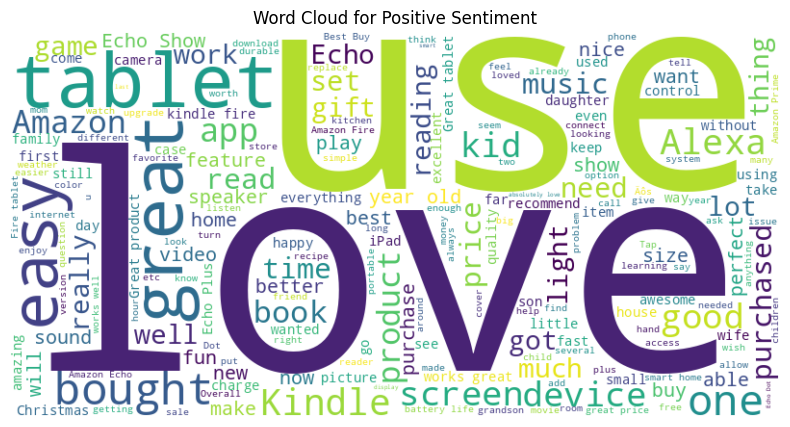

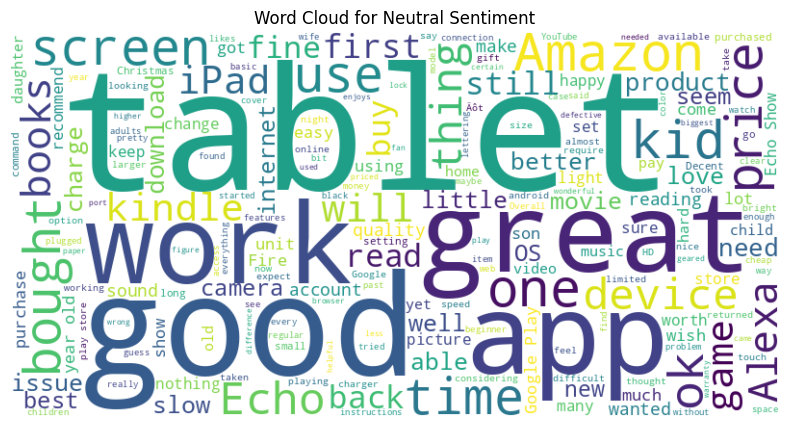

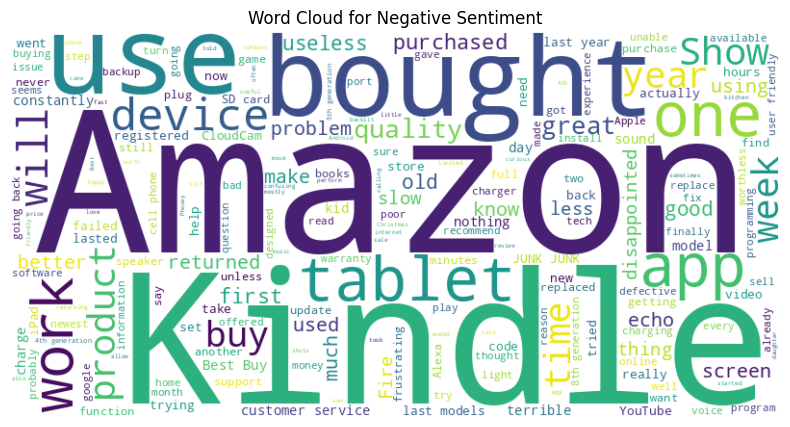

In [12]:
# Word Clouds for Positive, Neutral, and Negative Sentiments
for sentiment in data['sentiment'].unique():
    sentiment_text = ' '.join(data[data['sentiment'] == sentiment]['reviews.text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentiment_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {sentiment} Sentiment")
    plt.axis('off')
    plt.show()

The word clouds highlight the most frequently used words in reviews for each sentiment category (Positive, Neutral, Negative). Larger words represent higher frequency, providing insight into the dominant themes and keywords associated with each sentiment.

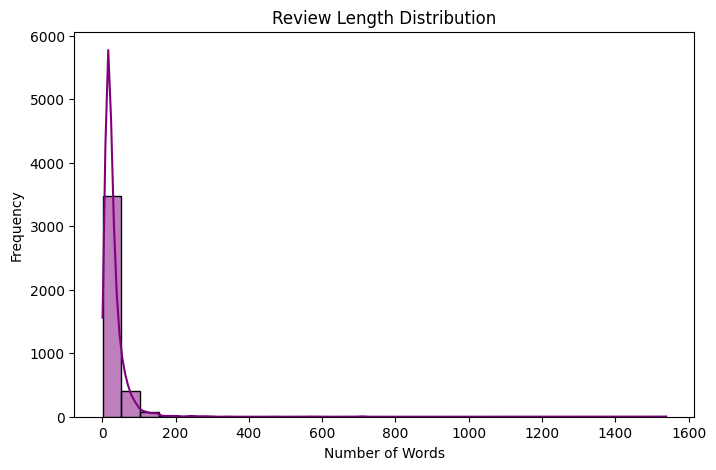

In [13]:
# Distribution of review lengths
data['review_length'] = data['reviews.text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 5))
sns.histplot(data['review_length'], bins=30, kde=True, color='purple')
plt.title('Review Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

The review length distribution plot shows the frequency of reviews based on the number of words they contain. It provides insights into how concise or detailed the reviews are, which can help assess text variability and its potential impact on model performance.

**Addressing Class Imbalance**



In [14]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [15]:
print("\n--- Addressing Class Imbalance ---\n")



--- Addressing Class Imbalance ---



In [16]:
# Check original class distribution
print("Original Sentiment Distribution:\n", Counter(data['sentiment']))

Original Sentiment Distribution:
 Counter({'Positive': 3739, 'Neutral': 158, 'Negative': 93})


<ipython-input-17-b54d851c4581>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['sentiment'], palette='coolwarm')


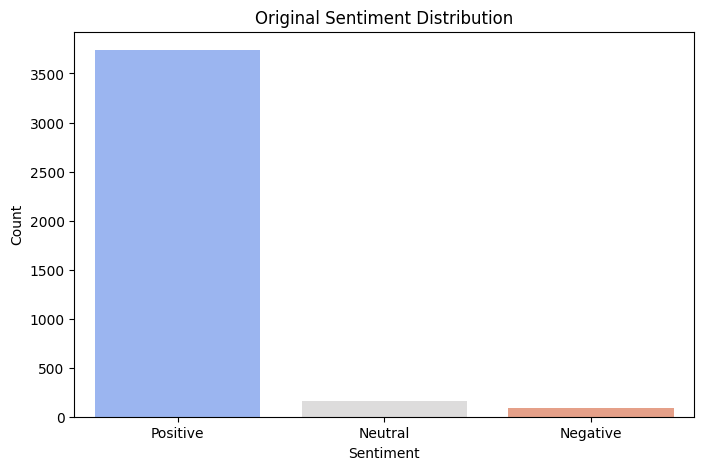

In [17]:
# Original Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=data['sentiment'], palette='coolwarm')
plt.title('Original Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

The original sentiment distribution plot displays the number of reviews in each sentiment category (Positive, Neutral, Negative) before any class balancing is applied. It highlights class imbalance in the dataset, which could impact model performance.

In [18]:
# Combine 'reviews.title' and 'reviews.text' into a single column
data['combined_review'] = data['reviews.title'] + " " + data['reviews.text']

In [19]:
# Apply oversampling on the combined column
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(data[['combined_review']], data['sentiment'])

In [20]:
# Update DataFrame for balanced data
balanced_data = pd.DataFrame({'review': X_resampled['combined_review'], 'sentiment': y_resampled})

# Check new class distribution
print("Balanced Sentiment Distribution:\n", Counter(balanced_data['sentiment']))

Balanced Sentiment Distribution:
 Counter({'Positive': 3739, 'Neutral': 3739, 'Negative': 3739})


<ipython-input-21-80bfc37c123a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=balanced_data['sentiment'], palette='coolwarm')


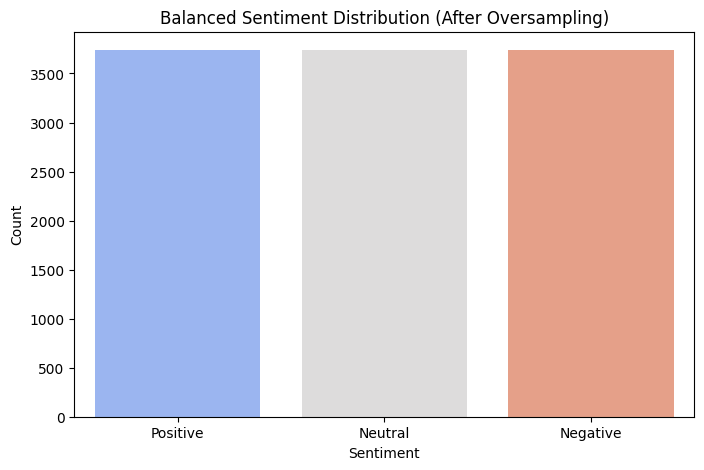

In [21]:
#  Balanced Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=balanced_data['sentiment'], palette='coolwarm')
plt.title('Balanced Sentiment Distribution (After Oversampling)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

The balanced sentiment distribution plot shows the count of reviews in each sentiment category (Positive, Neutral, Negative) after oversampling. It confirms that the class imbalance has been addressed, ensuring equal representation of all sentiment categories for fairer model training.

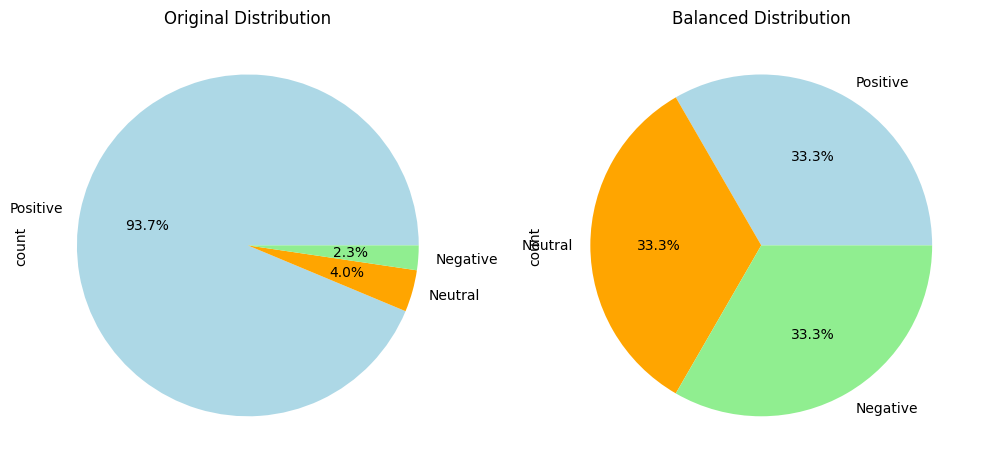

In [22]:
#  Pie Chart of Class Distribution (Before and After Oversampling)
fig, ax = plt.subplots(1, 2, figsize=(10, 9))
data['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], colors=['lightblue', 'orange', 'lightgreen'])
ax[0].set_title('Original Distribution')
balanced_data['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1], colors=['lightblue', 'orange', 'lightgreen'])
ax[1].set_title('Balanced Distribution')
plt.tight_layout()
plt.show()

The pie charts compare the class distribution of sentiments before and after oversampling. The left chart shows the original imbalance, where one or more sentiment categories dominate, while the right chart confirms that the distribution has been balanced, ensuring all categories have equal representation.

**Feature Engineering: TF-IDF Transformation**

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

print("\n--- TF-IDF Transformation ---\n")


--- TF-IDF Transformation ---



In [24]:
# Convert text data into numerical form using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf.fit_transform(balanced_data['review']).toarray()
y = balanced_data['sentiment']

In [25]:
# Display shape of the transformed data
print(f"TF-IDF Matrix Shape: {X_tfidf.shape}")

TF-IDF Matrix Shape: (11217, 4775)


In [26]:
# Visualize top features (words) from TF-IDF
tfidf_features = tfidf.get_feature_names_out()
tfidf_scores = np.mean(X_tfidf, axis=0)

In [27]:
# Top 10 words by average TF-IDF score
top_indices = np.argsort(tfidf_scores)[::-1][:10]
top_words = [tfidf_features[i] for i in top_indices]
top_scores = tfidf_scores[top_indices]

<ipython-input-28-b432a786c596>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_words, palette='viridis')


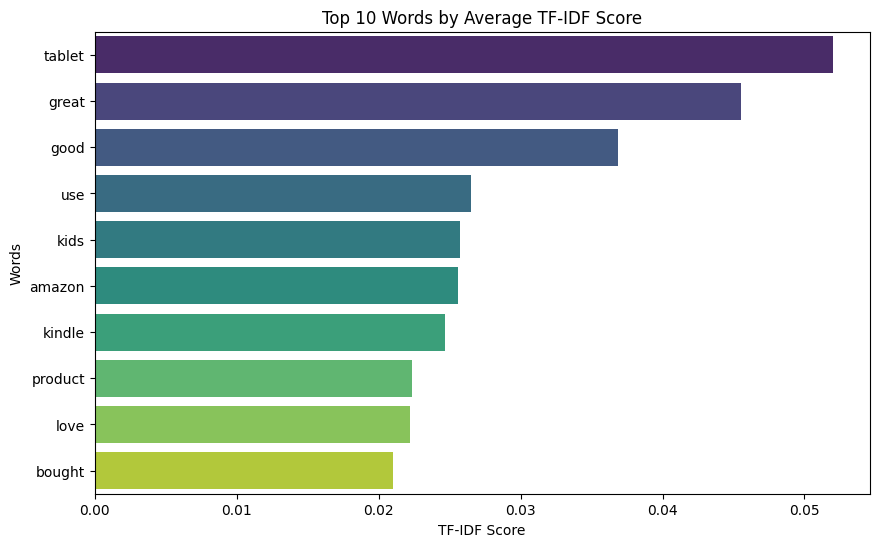

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_scores, y=top_words, palette='viridis')
plt.title('Top 10 Words by Average TF-IDF Score')
plt.xlabel('TF-IDF Score')
plt.ylabel('Words')
plt.show()

The bar plot shows the top 10 words with the highest average TF-IDF scores. These words are the most important and relevant for distinguishing between sentiment categories, as determined by the TF-IDF feature engineering process.


**Multinomial Naive Bayes Classifier**


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay


print("\n--- Multinomial Naive Bayes Classifier ---\n")


--- Multinomial Naive Bayes Classifier ---



In [30]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
# Train a Multinomial Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [32]:
# Predict on test data
y_pred_nb = nb_model.predict(X_test)

In [33]:
# Evaluate the model
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Naive Bayes Classification Report:
               precision    recall  f1-score   support

    Negative       0.97      1.00      0.98       748
     Neutral       0.93      0.97      0.95       748
    Positive       0.98      0.91      0.94       748

    accuracy                           0.96      2244
   macro avg       0.96      0.96      0.96      2244
weighted avg       0.96      0.96      0.96      2244

Confusion Matrix:
 [[748   0   0]
 [  7 724  17]
 [ 16  53 679]]
Accuracy: 0.9585561497326203


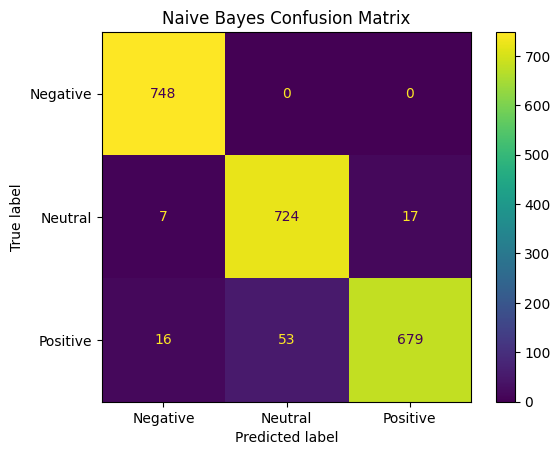

In [34]:
# Confusion Matrix Visualization
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb, display_labels=nb_model.classes_, cmap='viridis')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

The confusion matrix visualizes the performance of the Naive Bayes classifier by displaying the number of correct and incorrect predictions for each sentiment category.

**Support Vector Machine (SVM) Classifier**



In [35]:
from sklearn.svm import SVC

In [36]:
print("\n--- Support Vector Machine (SVM) ---\n")


--- Support Vector Machine (SVM) ---



In [37]:
# Train a Support Vector Machine classifier

svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [38]:
# Predict on test data
y_pred_svm = svm_model.predict(X_test)

In [39]:
# Evaluate the SVM model
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Classification Report:
               precision    recall  f1-score   support

    Negative       0.99      1.00      1.00       748
     Neutral       0.98      1.00      0.99       748
    Positive       1.00      0.97      0.98       748

    accuracy                           0.99      2244
   macro avg       0.99      0.99      0.99      2244
weighted avg       0.99      0.99      0.99      2244

Confusion Matrix:
 [[748   0   0]
 [  0 748   0]
 [  4  19 725]]
Accuracy: 0.9897504456327986


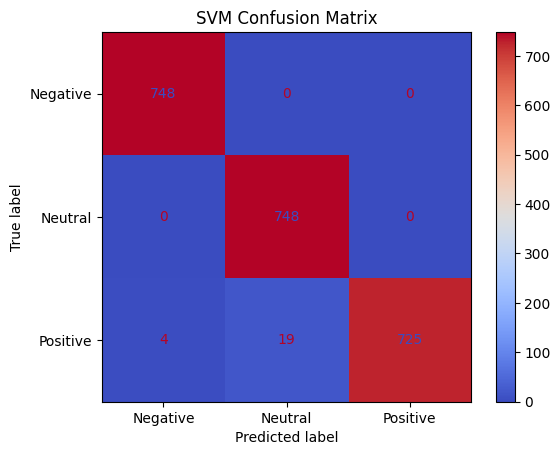

In [40]:
# Confusion Matrix Visualization
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, display_labels=svm_model.classes_, cmap='coolwarm')
plt.title('SVM Confusion Matrix')
plt.show()

The confusion matrix for the SVM model shows the breakdown of correct and incorrect predictions for each sentiment category.


In [41]:
# Precision-Recall Bar Plot
from sklearn.metrics import precision_recall_fscore_support

In [42]:
metrics = precision_recall_fscore_support(y_test, y_pred_svm, average=None)
labels = svm_model.classes_
metrics_df = pd.DataFrame({'Label': labels, 'Precision': metrics[0], 'Recall': metrics[1], 'F1-Score': metrics[2]})

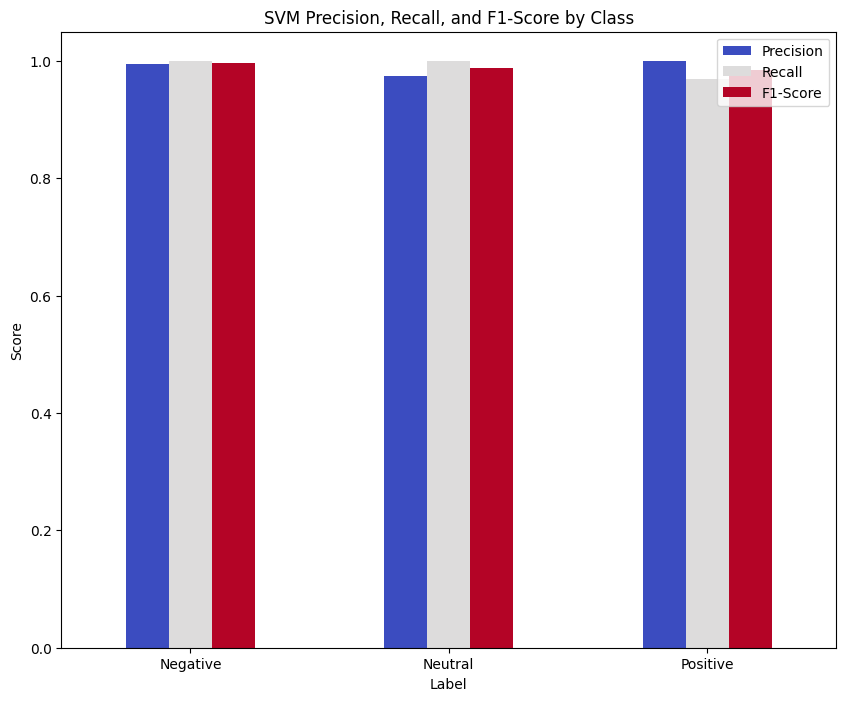

In [43]:
metrics_df.set_index('Label').plot(kind='bar', figsize=(10, 8), colormap='coolwarm', rot=0)
plt.title('SVM Precision, Recall, and F1-Score by Class')
plt.ylabel('Score')
plt.show()

This bar plot visualizes the Precision, Recall, and F1-Score for each sentiment category as predicted by the SVM model.

**Neural Network: LSTM Implementation**



In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

In [45]:
print("\n--- LSTM Neural Network ---\n")


--- LSTM Neural Network ---



In [46]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(balanced_data['review'])
X_seq = tokenizer.texts_to_sequences(balanced_data['review'])
X_padded = pad_sequences(X_seq, maxlen=100)

In [47]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

In [48]:
# Fit the encoder on the 'sentiment' column and transform it
y_encoded = label_encoder.fit_transform(y)

In [49]:
# Split data into training and testing sets
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [50]:
# Define the LSTM model
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=128),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(len(data['sentiment'].unique()), activation='softmax')
])

In [51]:
# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [52]:
# Train the LSTM model
lstm_model.fit(X_train_seq, y_train_seq, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 24s 163ms/step - accuracy: 0.6485 - loss: 0.8431 - val_accuracy: 0.9666 - val_loss: 0.0956
Epoch 2/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 43s 182ms/step - accuracy: 0.9805 - loss: 0.0673 - val_accuracy: 0.9855 - val_loss: 0.0428
Epoch 3/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 38s 156ms/step - accuracy: 0.9949 - loss: 0.0223 - val_accuracy: 0.9900 - val_loss: 0.0243
Epoch 4/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 19s 146ms/step - accuracy: 0.9979 - loss: 0.0092 - val_accuracy: 0.9889 - val_loss: 0.0336
Epoch 5/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 20s 145ms/step - accuracy: 0.9982 - loss: 0.0061 - val_accuracy: 0.9889 - val_loss: 0.0389


In [53]:
# Evaluate the LSTM model

lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_seq, y_test_seq)
print(f"LSTM Accuracy: {lstm_accuracy * 100:.2f}%")

71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9879 - loss: 0.0438
LSTM Accuracy: 98.48%


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step


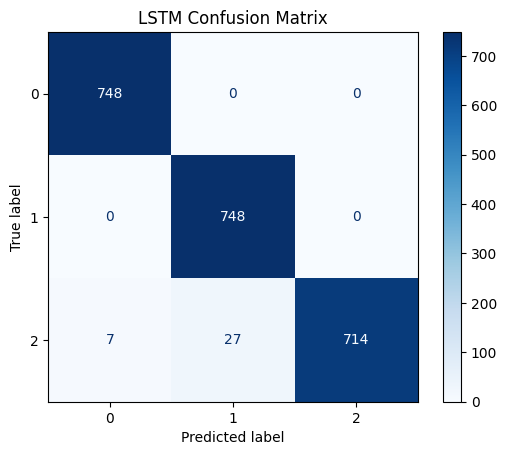

In [54]:
#  Confusion Matrix for LSTM Predictions
y_pred_lstm = np.argmax(lstm_model.predict(X_test_seq), axis=1)
ConfusionMatrixDisplay.from_predictions(y_test_seq, y_pred_lstm, cmap='Blues')
plt.title('LSTM Confusion Matrix')
plt.show()

The confusion matrix for LSTM predictions shows how well the LSTM model classifies each sentiment category. It provides insights into the model's accuracy, highlighting the number of true positives, false positives, and false negatives for each sentiment class, as well as any specific misclassification patterns.

**Topic Modeling with Latent Dirichlet Allocation (LDA)**



In [55]:
from sklearn.decomposition import LatentDirichletAllocation

In [56]:
print("\n--- Topic Modeling with Latent Dirichlet Allocation (LDA) ---\n")


--- Topic Modeling with Latent Dirichlet Allocation (LDA) ---



In [57]:
lda = LatentDirichletAllocation(n_components=5, random_state=42)
X_lda = tfidf.fit_transform(data['combined_review'])
lda.fit(X_lda)

LatentDirichletAllocation(n_components=5, random_state=42)

In [58]:
# Display topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}:")
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Topic 1:
['works', 'use', 'good', 'price', 'product', 'alexa', 'tablet', 'love', 'echo', 'great']
Topic 2:
['product', 'wife', 'books', 'love', 'use', 'easy', 'good', 'tablet', 'great', 'kindle']
Topic 3:
['love', 'good', 'use', 'year', 'old', 'easy', 'loves', 'great', 'kids', 'tablet']
Topic 4:
['place', 'bought', 'phone', 'neat', 'love', 'awesome', 'work', 'great', 'kindle', 'item']
Topic 5:
['use', 'price', 'sound', 'read', 'like', 'good', 'kindle', 'love', 'great', 'tablet']


<ipython-input-59-fbb32093fccb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_words, palette='mako')


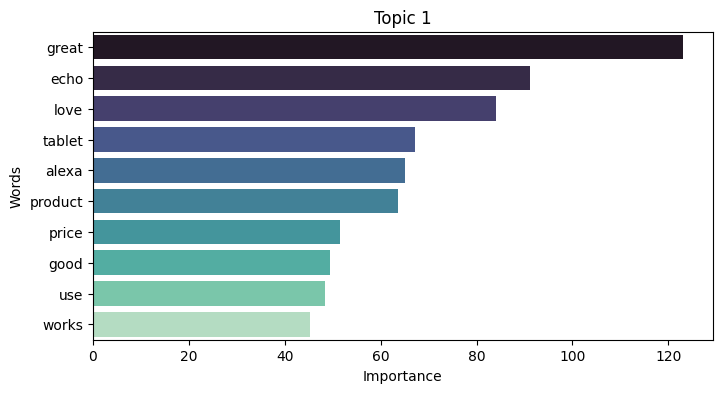

<ipython-input-59-fbb32093fccb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_words, palette='mako')


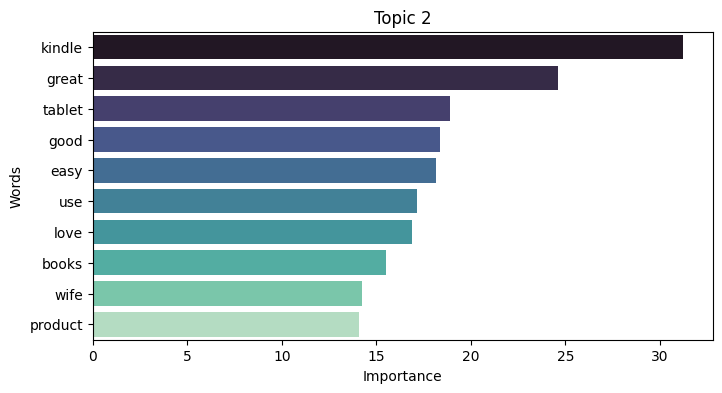

<ipython-input-59-fbb32093fccb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_words, palette='mako')


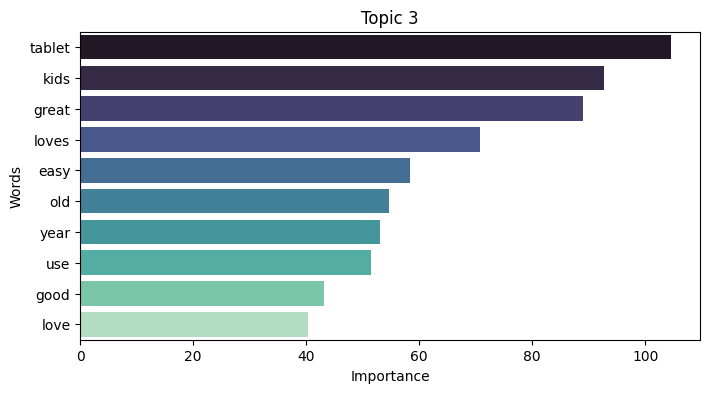

<ipython-input-59-fbb32093fccb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_words, palette='mako')


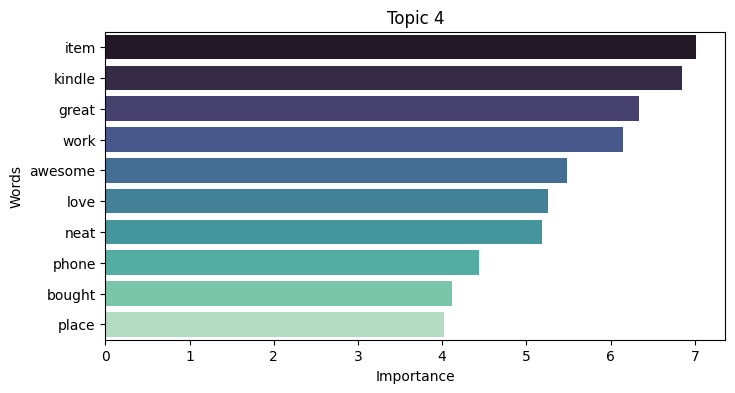

<ipython-input-59-fbb32093fccb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_words, palette='mako')


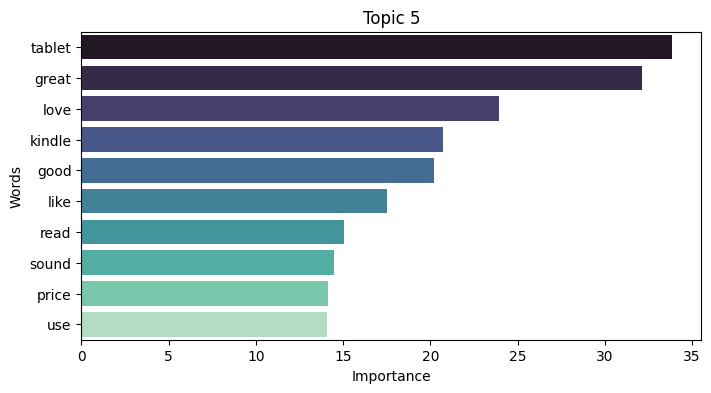

In [59]:
# Visualize LDA topics with word distributions
topics = lda.components_
vocab = tfidf.get_feature_names_out()

for topic_idx, topic in enumerate(topics):
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [vocab[i] for i in top_words_idx]
    top_scores = topic[top_words_idx]

    plt.figure(figsize=(8, 4))
    sns.barplot(x=top_scores, y=top_words, palette='mako')
    plt.title(f'Topic {topic_idx + 1}')
    plt.xlabel('Importance')
    plt.ylabel('Words')
    plt.show()

This visualization displays the top 10 words and their importance scores for each topic identified by the Latent Dirichlet Allocation (LDA) model. Each bar plot represents a topic, with the most significant words contributing to that topic. It helps interpret the themes or concepts present in the reviews and how they group into distinct clusters.

<ipython-input-60-940b60dafb5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='viridis')


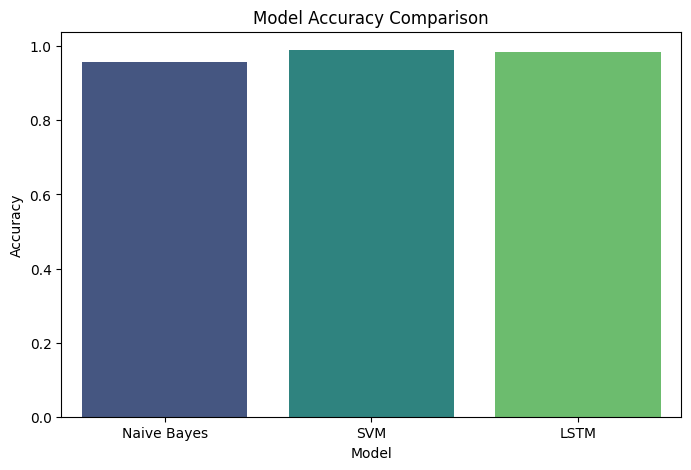

In [60]:
# Accuracy Comparison
accuracy_scores = {
    'Naive Bayes': accuracy_score(y_test, y_pred_nb),
    'SVM': accuracy_score(y_test, y_pred_svm),
    'LSTM': lstm_accuracy  # Already calculated during training
}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

In [61]:
import joblib

In [62]:
print("\n--- Saving Models ---\n")


--- Saving Models ---



In [63]:
# Save Naive Bayes and SVM models
joblib.dump(nb_model, 'naive_bayes_model.pkl')
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

In [64]:
# Save the LSTM model
lstm_model.save('lstm_model.keras')